# Projekt: Minimalizácia imisného zaťaženia - určenie optimálnej kombinácie výkonov viacerých spaľovacích zariadení

Cieľom projektu je určenie prevádzkových podielových výkonov jednotlivých spaľovacích zariadení prevádzkovaných vo zvolenom území ako zdrojov vykurovacieho tepla, pri zachovaní celkového potrebného prevádzkového výkonu (pre účely zásobovania teplom v danom území) minimalizujúcich sumárnu mieru imisného zaťaženia vo vybraných bodoch daného územia (ktoré môžu simulovať napríklad obytné zóny, alebo iné, na imisné zaťaženie citlivé oblasti).



### Teoretické odôvodnenie - výpočet imisného zaťaženia z viacerých zdrojov
Merné emisie jednotlivých znečisťujúcich látok zo spaľovacieho procesu štandardných palív je možné určiť z celkového výkonu spaľovacieho zariadenia na základe tzv. emisných faktorov (publikovaných vo vedeckej literatúre resp. v právnych predpisoch – vestníkoch). 
Predkladaný projekt (pre jednoduchosť)  považuje mernú emisiu spaľovacieho zariadenia a výkon zariadenia za ekvivalentné hodnoty. Optimálny výkon (optimálny z hľadiska minimalizácie imisného zaťaženia) príslušného spaľovacieho zariadenia vypočítaný v predloženom programe je priamo použitý ako koeficient úmernosti pre získanie zodpovedajúcej mernej emisie príslušného spaľovacieho zariadenia. Vzhľadom na skutočnosť, že výkon spaľovacieho zariadenia a merná emisia príslušnej znečisťujúcej látky sú v priamej súvislosti,  je uvedené zjednodušenie prípustné.
Hodnotu koncentrácie danej znečisťujúcej látky pri danej predpokladanej mernej emisii v okolí hodnoteného zdroja je možné aproximatívne určiť napríklad s využitím tzv. generalizovanej Gaussovej disperznej rovnice pre ustálený stav. Analytické riešenie uvedenej rovnice je možné použiť napríklad v nasledovnom tvare:

$$
C = \frac{Q}{u * {\sigma}_{z} * {\sigma}_{y} * 2 * {\pi}  } * \left[e^{ -\frac{y^{2}}{2 * {\sigma}_{y}^{2}}  }\right] * \left[ e^{- \frac{{(z_{r} - H_{e})}^{2}}  {2*{\sigma}_{z}^{2}}} + e^{  - \frac{{(z_{r} + H_{e})}^{2}}  {2*{\sigma}_{z}^{2}}   } \right]
$$

kde: \
&emsp; $C$ je  hľadaná koncentrácia príslušnej znečisťujúcej látky v bode so súradnicami [x,y,z] \
&emsp;&emsp;(x – vzdialenosť od zdroja v smere vetra, y – laterálna vzdialenosť od hlavnej osi smeru vetra prechádzajúcej zdrojom, z – výška bodu nad terénom) \
&emsp; $Q$ je hmotnostný tok príslušnej znečisťujúcej látky zo zdroja \
&emsp; $u$ je horizontálna rýchlosť vetra \
&emsp; ${H}_{e}$ je výška nad vyústeným komína zodpovedajúca „vznosu“ spalín \
&emsp; ${\sigma}_{z}$ je vertikálna štandardná odchýlka, zodpovedajúca rozptylu emisií v zvislej rovine, \
&emsp; ${\sigma}_{y}$ je horizontálna štandardná odchýlka, zodpovedajúca rozptylu emisií v laterálnej rovine. 

Z uvedeného analytického vzťahu je možné vypočítať ustálené koncentračné príspevky z ľubovoľného počtu zdrojov v skúmanom území. Platí zároveň (s ohľadom na charakter analytického riešenia), že uvedené analytické riešenie je vo vzťahu k celkovému hmotnostnému toku znečisťujúcej látky Q  z daného zdroja lineárnym zobrazením.
V zmysle vyššie uvedeného je teda možné aproximovať celkové ustálené imisné zaťaženie z viacerých spaľovacích zariadení  (zabezpečujúcich napríklad dodávku tepla v území) v konkrétnych záujmových bodoch ako súčty všetkých príspevkov jednotlivých spaľovacích zariadení v týchto bodoch.


### Výpočet imisného zaťaženia z jedného zdroja
Nasledujúci blok kódu vypočíta koncentrácie v jednotlivých uzloch mriežky výpočtovej oblasti a vypočítané koncentrácie reprezentuje v grafickej podobe (v skalárnej a "contour" verzii).

/home/musiljuraj/1rls/vvp/vvp-DU/project2/project/lib/ge.py:125: RuntimeWarning: invalid value encountered in power
  np.power(F, 1/3) * np.power(x_coor, 2/3) * (1/dispersion_params[1])
/home/musiljuraj/1rls/vvp/vvp-DU/project2/project/lib/ge.py:52: RuntimeWarning: invalid value encountered in scalar power
  (1+sigma_z_coef[class_indx][1] *
/home/musiljuraj/1rls/vvp/vvp-DU/project2/project/lib/ge.py:55: RuntimeWarning: invalid value encountered in scalar power
  (1+sigma_y_coef[class_indx][1] *
/home/musiljuraj/1rls/vvp/vvp-DU/project2/project/lib/ge.py:55: RuntimeWarning: divide by zero encountered in scalar power
  (1+sigma_y_coef[class_indx][1] *


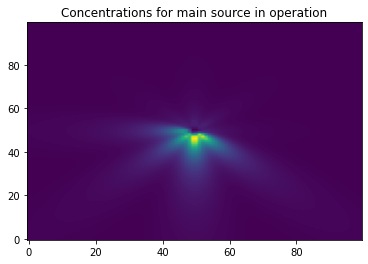

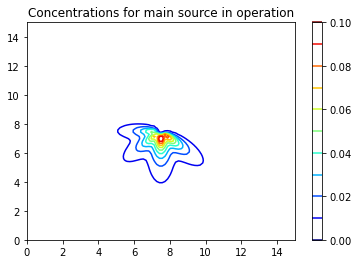

<Figure size 432x288 with 0 Axes>

In [13]:
import numpy as np
import scipy.optimize as spopt

from lib import getinput
from lib import output
from lib import ge

domain_params, dispersion_params, source_params_all, power_ratios_nominal = getinput.get_input(
    "./input/v01/", 5)

#define stability classes 
stabilityClass = ["A", "B", "C", "D", "E", "F"]

#Compute concentration values for whole domain, for every wind direction and for specified stability class 
tot_conc_field_main, tot_conc_field_distrib = ge.total_conc_fields_main_distr(
        source_params_all, dispersion_params, domain_params, "A")


#Show concentration values as a 2D graphs
file_name = 'print'
title = 'Concentrations for main source in operation'
output.create_graphs(tot_conc_field_main, file_name, title, domain_params)


### Výpočet imisného zaťaženia z viacerých zdrojov
Nasledujúci blok kódu vypočíta súhrnné koncentrácie (ako súčet všetkých koncentračných príspevkov všetkých uvažovaných zdrojov) v jednotlivých uzloch mriežky výpočtovej oblasti a vypočítané koncentrácie reprezentuje v grafickej podobe (v skalárnej a "contour" verzii).

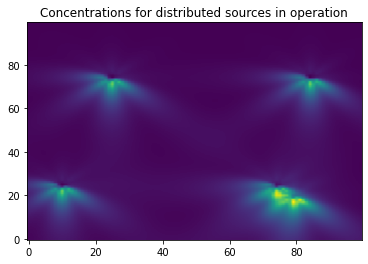

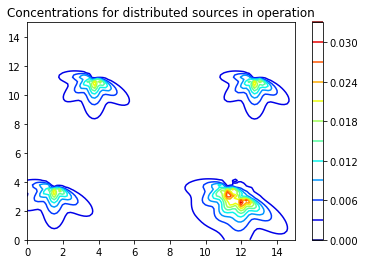

<Figure size 432x288 with 0 Axes>

In [14]:
tot_conc_field_main, tot_conc_field_distrib = ge.total_conc_fields_main_distr(
        source_params_all, dispersion_params, domain_params, "A")

file_name = 'print'
title = 'Concentrations for distributed sources in operation'
output.create_graphs(tot_conc_field_distrib,
                         file_name, title, domain_params)

### Teoretické odôvodnenie - optimálna kombinácia výkonov viacerých zdrojov
Pre v praxi pomerne bežnú situáciu nahrádzania veľkých centrálnych zdrojov tepla malými distribuovanými zdrojmi je, s ohľadom na vyššie spomínanú lineárnosť Gaussovej rovnice vo vzťahu k celkovému hmotnostnému toku navyše možné skúmať rôzne kombinácie výkonov spaľovacích zariadení (a tomu zodpovedajúce kombinácie hmotnostných tokov) s cieľom zistiť kombináciu výkonov, ktorá zabezpečí minimalizáciu celkového imisného zaťaženia zvolených oblastí v danom území (ktoré môžu reprezentovať napríklad obytné zóny, alebo iné, na imisné zaťaženie citlivé oblasti) pri zachovaní celkového spaľovacieho výkonu (a teda celkového požadovaného množstva dodaného tepla).

Pri určení optimálneho pomeru výkonov uvažovaných spaľovacích zariadení je možné vychádzať zo spomínanej lineárnej závislosti koncentrácie znečisťujúcej látky v danom bode výpočtovej mriežky od aktuálneho hmotnostného toku tejto látky na vyústení z komína spaľovacieho zariadenia. 
Za predpokladu, že vypočítame celkový maximálny koncentračný príspevok daného zdroja (pri jeho maximálnom výkone) v danom záujmovom bode, môžeme z matice takýchto koncentračných príspevkov :


$$
C = 
\left[
\begin{matrix}
\lVert C_{S1B1} \rVert & . & \lVert C_{SnB1} \rVert \\
. & . & . \\
\lVert C_{S1Bm} \rVert & . & \lVert C_{SnBm} \rVert
\end{matrix} \tag{3-1}
\right]
$$

kde: 
\
&emsp; $\lVert C_{SiBj} \rVert$ je koncentrácia znečisťujúcej látky v bode Bj, zo zdroja Si (pri jeho plnom výkone)

Riešenie maticovej rovnice 

$$
C*x = \lVert C_{TOT} \rVert
$$

kde: 

$$
\left[
\begin{matrix}
x_{1} \\
. \\
x_{n} \\
\end{matrix} \tag{3-1}
\right]
$$

je vektor skutočných výkonov jednotlivých uvažovaných zdrojov (ako podiel maximálneho výkonu),  a


$$
\left[
\begin{matrix}
\lVert C_{TOT,B1} \rVert \\
. \\
\lVert C_{TOT,Bm} \rVert \\
\end{matrix} \tag{3-1}
\right]
$$
\
je vektor koncentračných príspevkov všetkých zdrojov pri ich skutočných výkonoch v jednotlivých záujmových bodoch, ktorá pre viazaný vektor $x$ (s 1-normou rovnajúcou sa celkovému požadovanému výkonu) minimalizuje 1-normu vektora $\lVert C_{TOT} \rVert$ je potom hľadanou kombináciou výkonov spaľovacích zariadení minimalizujúcou celkové imisné zaťaženie v určených záujmových bodoch.

### Výpočet optimálnej kombinácie výkonov viacerých zdrojov
Nasledujúci blok vypočíta koncentračné príspevky každého zdroja, pri jeho plnom výkone, v každom záujmovom bode, pričom tieto (maximálne možné) príspevky sú ukladané do matice totalImissionConcentrations. \
Následne, s využitím funkcie scipy.optimize.minimize() hľadá kombináciu výkonov všetkých zdrojov ako viazané minimum maticového súčtu totalImissionConcentrations*x, s podmienkou celkového výkonu všetkých zdrojov rovných 1 a povoleným intervalom pre jednotlivé čiastkové výkony v rozmedzí <0,1>:

In [15]:
#Define all points in domain, for which total imission concentrations must as low as possible (for given total power-output of all sources)
x1 = [0.2, 0.6, 2]
x2 = [0.6, 0.7, 2]
points = [x1, x2]

"""
Compute total imission  in each point of interest as computed
concentration in this point from one source running at nominal power
output. Compute such total imission  for each point and for each source.
Result is m x n numbers (where m is a number of points of interest and n
is a number of sources), i.e. m x n matrix.     Represent the overal
imission polution in each point from all sources domain.
"""
source_count = len(source_params_all)
points_count = len(points)

# create matrix for total imission concentrations
tot_imission_conc = np.zeros(shape=(points_count, source_count))
# and fill it with computed total concentrations
for i in range(points_count):
    for j in range(source_count):
        x_coor = points[i][0]
        y_coor = points[i][1]
        z_coor = points[i][2]
        tot_imission_conc[i, j] = ge.conc_one_source(
            x_coor, y_coor, z_coor, source_params_all[j], dispersion_params, domain_params, "A")

"""
Compute optimal combinations of power-outputs of all sources
(optimal combination is the one, for which is sum of all total imission
concentrations in all points) minimal
(optimal power output is defined as ratio of nominal power-output of each
source, i.e. as number from <0,1 interval>)
Key constraint is, that combined optimal power output of all sources must
be constant (in order to supply necessary amount of heat)
"""

"""
define initial guess for power output ratios
dimension xinit must  be changed manually when the number of sources is
changed. In automated version, number of elements and their values should
be initiated according to number of sources and constraints on x
"""
lst = [0.4, 0.6, 0.6, 0.6, 0.6, 0.6]
# lst = [1, 0, 0, 0, 0, 0]
# lst = [0, 1, 1, 1, 1, 1]
xinit = np.array(lst)

# constraint that ensures constant total power output
def sum_power_out(x): return np.dot(x, power_ratios_nominal)
pow_ratio_constraint = spopt.NonlinearConstraint(sum_power_out, 1, 1)

# minimizing function
def minimizing_function(x): return (
    np.linalg.norm((tot_imission_conc@x), ord=1))

# find optimal combination
res = spopt.minimize(minimizing_function, x0=xinit,
                        bounds=[(0, 1), (0, 1), (0, 1),
                                (0, 1), (0, 1), (0, 1)],
                        constraints=pow_ratio_constraint)

opt_power_out = res.x

np. set_printoptions(precision=3)
print("Optimal combination of power outputs for all sources: ", opt_power_out)

Optimal combination of power outputs for all sources:  [0.167 1.    0.573 1.    0.592 1.   ]


a nasledujúci blok kódu vypočítava súhrnné koncentrácie pre všeky uvažované zdroje pri stanovenom optimálnom výkone a vypočítané koncentrácie reprezentuje v grafickej podobe (v skalárnej a "contour" verzii):

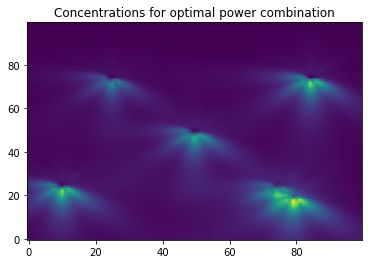

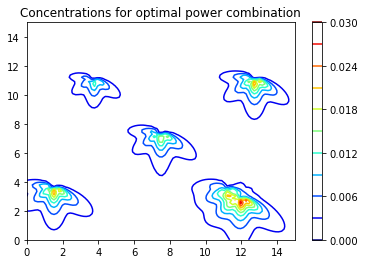

<Figure size 432x288 with 0 Axes>

In [16]:
# adjust source power output in each source to optimal values
source_params_opt_all = []
for source in range(0, len(opt_power_out)):
    source_params_opt_all.append(source_params_all[source])
    source_params_opt_all[source][6] = opt_power_out[source] * \
        source_params_all[source][6]

# and compute total imission concentration with all sources running at this power output (example with stability class A)
tot_conc_field_opt = ge.gauss_disp_eq_total_conc_field(
    source_params_opt_all[0], dispersion_params, domain_params, "A")
for source in range(1, len(source_params_opt_all)):
    tot_conc_field_opt += ge.gauss_disp_eq_total_conc_field(
        source_params_opt_all[source], dispersion_params, domain_params, "A")

# create graph with optimal imission concentration
file_name = 'print'
title = 'Concentrations for optimal power combination'
output.create_graphs(tot_conc_field_opt, file_name, title, domain_params)

#### Export dát
Nasledujúci blok kódu ukladá všetky vypočítané súhrnné koncentrácie (pre centrálny zdroj v samostatnej prevádzke, pre distribuované zdroje v samostatnej prevádzke a pre optimálnu kombináciu centrálneho a distribuovaných zdrojov) do csv súborov.
Rovnako ukladá 2D grafické znázornenia pre všetky vyššie uvedené varianty do .png súborov.

In [17]:

#save all computed concentration fields
np.savetxt("./output/imissionConc_optimal.csv",
               tot_conc_field_opt, delimiter=",")
np.savetxt("./output/imissionConc_main.csv",
               tot_conc_field_main, delimiter=",")
np.savetxt("./output/imissionConc_distributed.csv",
            tot_conc_field_distrib, delimiter=",")

#save the corresponding graphs
file_name = 'plot_optimal'
title = 'Concentrations for optimal power combination'
output.create_graphs(tot_conc_field_opt, file_name, title, domain_params)

file_name = 'plot_main'
title = 'Concentrations for main source in operation'
output.create_graphs(tot_conc_field_main, file_name, title, domain_params)

file_name = 'plot_distributed'
title = 'Concentrations for distributed sources in operation'
output.create_graphs(tot_conc_field_distrib,
                        file_name, title, domain_params)

<Figure size 432x288 with 0 Axes>